<a href="https://colab.research.google.com/github/igornunespatricio/spark-project-customer-churn/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up environment


1.   Install Java
2.   Install and unpack Spark and Hadoop Distributed File System (HDFS)
3.   Define environment variables for Java and Spark
4.   Install and initialize findspark
5.   Check Spark installation



In [1]:
# Java installation
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
# Downloading Spark and Hadoop Distributed File System (HDFS) files
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

# Unpacking files
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

In [3]:
# Importing os library
import os

# Defining Java's system variable
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Defining Spark's system variable
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [4]:
# Necessary to run PySpark
!pip install -q findspark

In [5]:
# Importing installed finspark library
import findspark

# Initialize findspark
findspark.init()

In [6]:
# # Importing package to initialize Spark session
from pyspark.sql import SparkSession

# # Imprting package to get number of cpu workers
# import multiprocessing

# cores = multiprocessing.cpu_count() # Count the number of cores in the computer
# print(f"Computer has {cores} cores")

# # Initialize spark session
# sc = SparkSession.builder.master('local[*]').getOrCreate()

# # Check if session was created
# sc

If everything is right, the output of the last cell should per below:

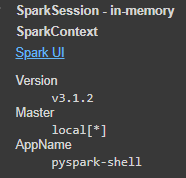

# Downloading Kaggle Dataset

In this case, a customer-churn dataset found [here](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset) will be used. More info on the dataset in this link.

1. Install Kaggle package
2. Upload kaggle.json file with credentials (follow instructions [here](https://www.kaggle.com/discussions/general/74235))
3. Create kaggle directory
4. Upload kaggle.json file
5. Change permition of kaggle json file
6. Copy API command from the Kaggle dataset you want to use by clicking in $\ \vdots$  
 and then "Copy API Command". In this case, [this](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset) dataset is being used
7. Paste the copied command above in a new code cell and run
8. After waiting the download to finish, under the /content diretory you should have the zipped file with the dataset in the /content directory
9. Unzip the data into a directory of choice. In this case, "customer-churn"

In [7]:
# Importing Kaggle package
!pip install -q kaggle

In [8]:
# Upload your Kaggles API secret KEY in file kaggle.json (link: https://www.kaggle.com/discussions/general/74235)
from google.colab import files
files_uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [9]:
# Create kaggle directory
!mkdir ~/.kaggle

In [10]:
# Copy kaggle json file to the created directory
! cp kaggle.json ~/.kaggle/

In [11]:
# Change permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
# Check if everything is correct
!kaggle datasets list

ref                                                                   title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                          Global Country Information Dataset 2023             23KB  2023-07-08 20:37:33          10788        421  1.0              
nelgiriyewithana/global-youtube-statistics-2023                       Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38           2923        117  1.0              
joebeachcapital/global-earth-temperatures                             Global Earth Temperatures                           33KB  2023-08-09 06:21:51            607         28  1.0              
joebeachcapital/top-500-hollywood-m

In [13]:
# Downloading the Dataset from Kaggle
!kaggle datasets download -d muhammadshahidazeem/customer-churn-dataset

  0% 0.00/6.66M [00:00<?, ?B/s]
100% 6.66M/6.66M [00:00<00:00, 73.3MB/s]


In [14]:
# Unzipping content to another folder
!unzip /content/customer-churn-dataset.zip -d customer-churn

Archive:  /content/customer-churn-dataset.zip
  inflating: customer-churn/customer_churn_dataset-testing-master.csv  
  inflating: customer-churn/customer_churn_dataset-training-master.csv  


# Exploratory Data Analysis

In [ ]:
# Create Spark session
FILEPATH = "/content/customer-churn/customer_churn_dataset-training-master.csv"
sp = SparkSession.builder.master("local[1]")\
          .appName("Customer-Churn")\
          .getOrCreate()
# Read csv file (if another file  type, search PySpark documentation)
df = sp.read.options(header=True).csv(FILEPATH)

In [ ]:
# Show 10 first rows of dataframe
df.show(10)

+----------+---+------+------+---------------+-------------+-------------+-----------------+---------------+-----------+----------------+-----+
|CustomerID|Age|Gender|Tenure|Usage Frequency|Support Calls|Payment Delay|Subscription Type|Contract Length|Total Spend|Last Interaction|Churn|
+----------+---+------+------+---------------+-------------+-------------+-----------------+---------------+-----------+----------------+-----+
|         2| 30|Female|    39|             14|            5|           18|         Standard|         Annual|        932|              17|    1|
|         3| 65|Female|    49|              1|           10|            8|            Basic|        Monthly|        557|               6|    1|
|         4| 55|Female|    14|              4|            6|           18|            Basic|      Quarterly|        185|               3|    1|
|         5| 58|  Male|    38|             21|            7|            7|         Standard|        Monthly|        396|              29

In [ ]:
df = df.dropna(how="any")

In [ ]:
# Showing dataset Schema
df.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Tenure: string (nullable = true)
 |-- Usage Frequency: string (nullable = true)
 |-- Support Calls: string (nullable = true)
 |-- Payment Delay: string (nullable = true)
 |-- Subscription Type: string (nullable = true)
 |-- Contract Length: string (nullable = true)
 |-- Total Spend: string (nullable = true)
 |-- Last Interaction: string (nullable = true)
 |-- Churn: string (nullable = true)



In [ ]:
# Count rows and columns
print(f'Number of rows: {df.count()}')
print(f'Number of columns: {len(df.columns)}')

Number of rows: 440832
Number of columns: 12


In [ ]:
# Drop duplicates by Customer ID
df = df.dropDuplicates(['CustomerID'])

In [ ]:
# Changing column type
from pyspark.sql.types import (
    StringType, BooleanType, IntegerType, FloatType, DoubleType
)
from pyspark.sql.functions import col

df = df.withColumn("Age", col("Age").cast(IntegerType()))\
.withColumn("Tenure", col("Tenure").cast(IntegerType()))\
.withColumn("Usage Frequency", col("Usage Frequency").cast(IntegerType()))\
.withColumn("Support Calls", col("Support Calls").cast(IntegerType()))\
.withColumn("Payment Delay", col("Payment Delay").cast(IntegerType()))\
.withColumn("Total Spend", col("Total Spend").cast(FloatType()))\
.withColumn("Last Interaction", col("Last Interaction").cast(IntegerType()))\
.withColumn("Churn", col("Churn").cast(IntegerType()))\
.drop(col("CustomerID"))

df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- Usage Frequency: integer (nullable = true)
 |-- Support Calls: integer (nullable = true)
 |-- Payment Delay: integer (nullable = true)
 |-- Subscription Type: string (nullable = true)
 |-- Contract Length: string (nullable = true)
 |-- Total Spend: float (nullable = true)
 |-- Last Interaction: integer (nullable = true)
 |-- Churn: integer (nullable = true)



In [ ]:
# Changing column name to replace space with _
for column in df.columns:
    df = df.withColumnRenamed(column, column if ' ' not in column else column.replace(' ','_'))
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- Usage_Frequency: integer (nullable = true)
 |-- Support_Calls: integer (nullable = true)
 |-- Payment_Delay: integer (nullable = true)
 |-- Subscription_Type: string (nullable = true)
 |-- Contract_Length: string (nullable = true)
 |-- Total_Spend: float (nullable = true)
 |-- Last_Interaction: integer (nullable = true)
 |-- Churn: integer (nullable = true)



In [ ]:
import pyspark.sql.functions as F
# Number of Churns and not Churns
df.groupBy("Churn") \
    .agg(
        F.count("Churn").alias("num_people"), \
    )\
    .show()

+-----+----------+
|Churn|num_people|
+-----+----------+
|    1|    249999|
|    0|    190833|
+-----+----------+



In [ ]:
from pyspark.sql.functions import struct
def groupby_and_describe(df, group_col, stat_col):
    """
    df has to be a pyspark dataframe
    Compute statistics for the column in stat_col after grouping
    by group_col.
    if stat_col is IntegerType or FloatType, calculates quantiles, median, max,...
    if stat_col is StringType, count occurence by each category
    Take the resulting datafarame and nest the statistics columns.
    """
    assert group_col != stat_col, f"group_col and stat_col can't be the same, they are {group_col} and {stat_col}, respectively."

    grouped = df.groupby(group_col)
    column = df.schema[stat_col]
    # if column is IntegerType or FloatType
    if (isinstance(column.dataType, IntegerType) or isinstance(column.dataType, FloatType)) and (column.name != group_col):
        # group and create statistics
        output = grouped.agg(
            F.mean(stat_col).alias("mean"),
            F.stddev(stat_col).alias("std"),
            F.min(stat_col).alias("min"),
            F.percentile_approx(stat_col, 0.25).alias("25%"),
            F.percentile_approx(stat_col, 0.50).alias("50%"),
            F.percentile_approx(stat_col, 0.75).alias("75%"),
            F.max(stat_col).alias("max"),
        )
        # structure the dataframe
        output = output.select(
            group_col,
            struct("mean", "std", "min", "25%", "50%", "75%", "max")\
            .alias(stat_col)
        )
        return output
    # if the column is StringType
    elif isinstance(column.dataType, StringType) and (column.name != group_col):
        # group by group_col and pivot the stat_col and count occurences
        output = df.groupby(group_col).pivot(stat_col).count()
        # change columns from long to IntegerType
        cols2change = [col for col in output.columns if col != group_col]
        for column in cols2change:
            output = output.withColumn(column, col(column).cast(IntegerType()))
        # Structure the dataframe
        output = output.select(
            group_col,
            struct(cols2change)\
            .alias(stat_col)
        )
        return output

# Join statistics for each column by Churn value keeping nested columns
joined = None
aggregate_cols = [col for col in df.columns if col != "Churn"]
for column in aggregate_cols:
    print(f'Variable: {column}')
    grouped_temp = groupby_and_describe(
        df=df,
        group_col="Churn",
        stat_col=column
        )
    if not joined:
        joined = grouped_temp
    else:
        joined = joined.join(grouped_temp, on=["Churn"])

joined.printSchema()

Variable: Age
Variable: Gender
Variable: Tenure
Variable: Usage_Frequency
Variable: Support_Calls
Variable: Payment_Delay
Variable: Subscription_Type
Variable: Contract_Length
Variable: Total_Spend
Variable: Last_Interaction
root
 |-- Churn: integer (nullable = true)
 |-- Age: struct (nullable = false)
 |    |-- mean: double (nullable = true)
 |    |-- std: double (nullable = true)
 |    |-- min: integer (nullable = true)
 |    |-- 25%: integer (nullable = true)
 |    |-- 50%: integer (nullable = true)
 |    |-- 75%: integer (nullable = true)
 |    |-- max: integer (nullable = true)
 |-- Gender: struct (nullable = false)
 |    |-- Female: integer (nullable = true)
 |    |-- Male: integer (nullable = true)
 |-- Tenure: struct (nullable = false)
 |    |-- mean: double (nullable = true)
 |    |-- std: double (nullable = true)
 |    |-- min: integer (nullable = true)
 |    |-- 25%: integer (nullable = true)
 |    |-- 50%: integer (nullable = true)
 |    |-- 75%: integer (nullable = true)
 

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
boxplots = {}

for column in df.schema:
    print(column.name)
    temp = df.select("Churn", column.name)
    if (isinstance(column.dataType, IntegerType) or isinstance(column.dataType, FloatType)) and (column.name != "Churn"):
        fig = px.box(
            temp.toPandas(),
            x="Churn", y=column.name, color="Churn",
            title=f"{column.name} x Churn"
        )\
        .update_layout(
            yaxis_title=None, xaxis_title=None,
            title_x=0.5, title_font_size=30
        )
        boxplots[column.name] = fig
    elif (isinstance(column.dataType, StringType) and (column.name != "Churn")):
        # create bar chart with plotly
        grouped_test = df.select("Churn", column.name).groupby("Churn").pivot(column.name).count().withColumn("Churn", F.col("Churn").cast("string"))
        y_axis = [item for item in grouped_test.columns if item != "Churn"]
        fig = px.histogram(
            grouped_test.toPandas(),
            x="Churn",
            y=y_axis,
            barnorm="percent",
            text_auto='.2f'
        ).update_layout(
            yaxis_title=None, xaxis_title=None, title=f"Churn x {column.name} (%)",
            title_x=0.5, title_font_size=30
        )
        boxplots[column.name] = fig


import os
from google.colab import files

if not os.path.isdir("charts"):
    os.mkdir("charts")

for key, chart in boxplots.items():
    chart.write_html(f"charts/boxplot_{key}_x_Churn.html")

# for downloading files one by one
# [files.download("charts/" + item) for item in os.listdir("charts")]

# for creating a zip file with the charts and downloading it
!zip -r charts.zip charts/
files.download('charts.zip')

Age
Gender
Tenure
Usage_Frequency
Support_Calls
Payment_Delay
Subscription_Type
Contract_Length
Total_Spend
Last_Interaction
Churn
  adding: charts/ (stored 0%)
  adding: charts/boxplot_Age_x_Churn.html (deflated 74%)
  adding: charts/boxplot_Contract_Length_x_Churn.html (deflated 70%)
  adding: charts/boxplot_Usage_Frequency_x_Churn.html (deflated 74%)
  adding: charts/boxplot_Total_Spend_x_Churn.html (deflated 76%)
  adding: charts/boxplot_Subscription_Type_x_Churn.html (deflated 70%)
  adding: charts/boxplot_Gender_x_Churn.html (deflated 70%)
  adding: charts/boxplot_Last_Interaction_x_Churn.html (deflated 74%)
  adding: charts/boxplot_Tenure_x_Churn.html (deflated 74%)
  adding: charts/boxplot_Support_Calls_x_Churn.html (deflated 76%)
  adding: charts/boxplot_Payment_Delay_x_Churn.html (deflated 74%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>